# Phân tích và So sánh Dữ liệu Định vị Trong nhà

Notebook này phân tích và so sánh hai tập tin dữ liệu định vị trong nhà:
- **B0_training_data_m95.csv**: Dữ liệu huấn luyện
- **B0_validation_data_m95.csv**: Dữ liệu xác thực

Dữ liệu này có vẻ được thu thập từ hệ thống định vị trong nhà sử dụng Wi-Fi Access Points (AP) với các thông tin bao gồm:
- Thông tin không gian: FLOOR, BUILDINGID, SPACEID
- Tọa độ: LONGITUDE, LATITUDE  
- Cường độ tín hiệu từ các Access Point (AP13, AP14, AP35, ...)
- Thông tin người dùng và thiết bị: USERID, PHONEID

## 1. Nạp các thư viện cần thiết

In [4]:
# Cài đặt các thư viện cần thiết
%pip install pandas numpy matplotlib seaborn scipy

# Import các thư viện sau khi cài đặt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("Các thư viện đã được cài đặt và import thành công!")

  Using cached pandas-2.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.16.0-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-macosx_10_13_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached p

In [3]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cấu hình
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Đã import thành công các thư viện!")

ModuleNotFoundError: No module named 'pandas'

## 2. Đọc dữ liệu từ hai tập tin CSV

In [5]:
# Đọc dữ liệu từ hai tập tin CSV
training_data = pd.read_csv('B0_training_data_m95.csv')
validation_data = pd.read_csv('B0_validation_data_m95.csv')

print("Đã đọc thành công hai tập tin dữ liệu!")
print(f"Dữ liệu training: {training_data.shape}")
print(f"Dữ liệu validation: {validation_data.shape}")

# Hiển thị 5 dòng đầu của mỗi tập dữ liệu
print("\n=== 5 dòng đầu của dữ liệu Training ===")
print(training_data.head())

print("\n=== 5 dòng đầu của dữ liệu Validation ===")
print(validation_data.head())

Đã đọc thành công hai tập tin dữ liệu!
Dữ liệu training: (5249, 21)
Dữ liệu validation: (536, 21)

=== 5 dòng đầu của dữ liệu Training ===
   FLOOR  BUILDINGID  SPACEID  RELATIVEPOSITION  USERID  PHONEID  \
0    0.0         0.0    122.0               2.0    11.0     13.0   
1    0.0         0.0    102.0               2.0    11.0     13.0   
2    0.0         0.0    110.0               2.0    11.0     13.0   
3    0.0         0.0    111.0               2.0    11.0     13.0   
4    0.0         0.0    107.0               2.0    11.0     13.0   

      TIMESTAMP  LONGITUDE      LATITUDE   AP13   AP14   AP35   AP36   AP41  \
0  1.369910e+09 -7632.1436  4.864982e+06 -105.0 -105.0 -105.0 -105.0 -105.0   
1  1.369909e+09 -7637.2570  4.864950e+06 -105.0 -105.0 -105.0 -105.0 -105.0   
2  1.369909e+09 -7628.1345  4.864977e+06 -105.0 -105.0 -105.0 -105.0 -105.0   
3  1.369909e+09 -7622.0546  4.864976e+06 -105.0 -105.0  -92.0  -91.0 -105.0   
4  1.369909e+09 -7636.2057  4.864967e+06 -105.0 -105.0 -1

## 3. Khám phá dữ liệu

Trong phần này, chúng ta sẽ khám phá cấu trúc và đặc điểm cơ bản của hai tập dữ liệu.

In [7]:
# Khám phá cấu trúc dữ liệu cơ bản
print("=== THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===")
print("\n1. THÔNG TIN TRAINING DATA:")
print(f"- Kích thước: {training_data.shape}")
print(f"- Số cột: {training_data.shape[1]}")
print(f"- Tên các cột: {list(training_data.columns)}")

print("\n2. THÔNG TIN VALIDATION DATA:")
print(f"- Kích thước: {validation_data.shape}")
print(f"- Số cột: {validation_data.shape[1]}")
print(f"- Tên các cột: {list(validation_data.columns)}")

print("\n3. KIỂU DỮ LIỆU TRAINING:")
print(training_data.dtypes)

print("\n4. KIỂU DỮ LIỆU VALIDATION:")
print(validation_data.dtypes)

=== THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===

1. THÔNG TIN TRAINING DATA:
- Kích thước: (5249, 21)
- Số cột: 21
- Tên các cột: ['FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'LONGITUDE', 'LATITUDE', 'AP13', 'AP14', 'AP35', 'AP36', 'AP41', 'AP42', 'AP51', 'AP52', 'AP155', 'AP156', 'AP161', 'AP162']

2. THÔNG TIN VALIDATION DATA:
- Kích thước: (536, 21)
- Số cột: 21
- Tên các cột: ['FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'LONGITUDE', 'LATITUDE', 'AP13', 'AP14', 'AP35', 'AP36', 'AP41', 'AP42', 'AP51', 'AP52', 'AP155', 'AP156', 'AP161', 'AP162']

3. KIỂU DỮ LIỆU TRAINING:
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
USERID              float64
                     ...   
AP52                float64
AP155               float64
AP156               float64
AP161               float64
AP162               float64
Length: 21, dtype: object

4. KIỂU D

In [8]:
# Thống kê mô tả cho dữ liệu training
print("=== THỐNG KÊ MÔ TẢ TRAINING DATA ===")
print(training_data.describe())

print("\n=== THỐNG KÊ MÔ TẢ VALIDATION DATA ===")
print(validation_data.describe())

=== THỐNG KÊ MÔ TẢ TRAINING DATA ===
             FLOOR  BUILDINGID      SPACEID  RELATIVEPOSITION       USERID  \
count  5249.000000      5249.0  5249.000000       5249.000000  5249.000000   
mean      1.603163         0.0   167.989903          1.994475     5.785673   
std       1.083094         0.0    51.158690          0.074131     4.995880   
min       0.000000         0.0   101.000000          1.000000     1.000000   
25%       1.000000         0.0   118.000000          2.000000     1.000000   
50%       2.000000         0.0   140.000000          2.000000     1.000000   
75%       3.000000         0.0   218.000000          2.000000    11.000000   
max       3.000000         0.0   241.000000          2.000000    11.000000   

           PHONEID     TIMESTAMP    LONGITUDE      LATITUDE         AP13  \
count  5249.000000  5.249000e+03  5249.000000  5.249000e+03  5249.000000   
mean     13.521433  1.370588e+09 -7639.311545  4.864958e+06   -93.212802   
std       0.499588  4.862150e+05

## 4. Kiểm tra dữ liệu thiếu và giá trị đặc biệt

Trong phần này, chúng ta sẽ kiểm tra dữ liệu thiếu (missing values) và các giá trị đặc biệt trong tập dữ liệu.

In [9]:
# Kiểm tra dữ liệu thiếu
print("=== KIỂM TRA DỮ LIỆU THIẾU ===")
print("\n1. TRAINING DATA - Số lượng giá trị thiếu theo từng cột:")
missing_train = training_data.isnull().sum()
print(missing_train[missing_train > 0])
if missing_train.sum() == 0:
    print("Không có giá trị thiếu trong training data")

print("\n2. VALIDATION DATA - Số lượng giá trị thiếu theo từng cột:")
missing_val = validation_data.isnull().sum()
print(missing_val[missing_val > 0])
if missing_val.sum() == 0:
    print("Không có giá trị thiếu trong validation data")

# Kiểm tra giá trị đặc biệt (có vẻ như -105 có thể là giá trị đặc biệt cho AP)
print("\n=== KIỂM TRA GIÁ TRỊ ĐẶC BIỆT ===")
ap_columns = [col for col in training_data.columns if col.startswith('AP')]
print(f"Các cột AP: {ap_columns}")

print("\n3. Phân bố giá trị -105 trong các cột AP (Training data):")
for col in ap_columns:
    count_neg105 = (training_data[col] == -105).sum()
    total = len(training_data)
    percentage = (count_neg105 / total) * 100
    print(f"{col}: {count_neg105}/{total} ({percentage:.1f}%)")

print("\n4. Phân bố giá trị -105 trong các cột AP (Validation data):")
for col in ap_columns:
    count_neg105 = (validation_data[col] == -105).sum()
    total = len(validation_data)
    percentage = (count_neg105 / total) * 100
    print(f"{col}: {count_neg105}/{total} ({percentage:.1f}%)")

=== KIỂM TRA DỮ LIỆU THIẾU ===

1. TRAINING DATA - Số lượng giá trị thiếu theo từng cột:
Series([], dtype: int64)
Không có giá trị thiếu trong training data

2. VALIDATION DATA - Số lượng giá trị thiếu theo từng cột:
Series([], dtype: int64)
Không có giá trị thiếu trong validation data

=== KIỂM TRA GIÁ TRỊ ĐẶC BIỆT ===
Các cột AP: ['AP13', 'AP14', 'AP35', 'AP36', 'AP41', 'AP42', 'AP51', 'AP52', 'AP155', 'AP156', 'AP161', 'AP162']

3. Phân bố giá trị -105 trong các cột AP (Training data):
AP13: 3274/5249 (62.4%)
AP14: 3294/5249 (62.8%)
AP35: 3559/5249 (67.8%)
AP36: 3545/5249 (67.5%)
AP41: 3517/5249 (67.0%)
AP42: 3491/5249 (66.5%)
AP51: 3037/5249 (57.9%)
AP52: 3079/5249 (58.7%)
AP155: 2950/5249 (56.2%)
AP156: 2914/5249 (55.5%)
AP161: 3149/5249 (60.0%)
AP162: 3176/5249 (60.5%)

4. Phân bố giá trị -105 trong các cột AP (Validation data):
AP13: 379/536 (70.7%)
AP14: 371/536 (69.2%)
AP35: 359/536 (67.0%)
AP36: 351/536 (65.5%)
AP41: 386/536 (72.0%)
AP42: 377/536 (70.3%)
AP51: 339/536 (63.2%)

## 5. So sánh phân phối các trường số

Trong phần này, chúng ta sẽ so sánh phân phối của các trường số giữa tập training và validation.

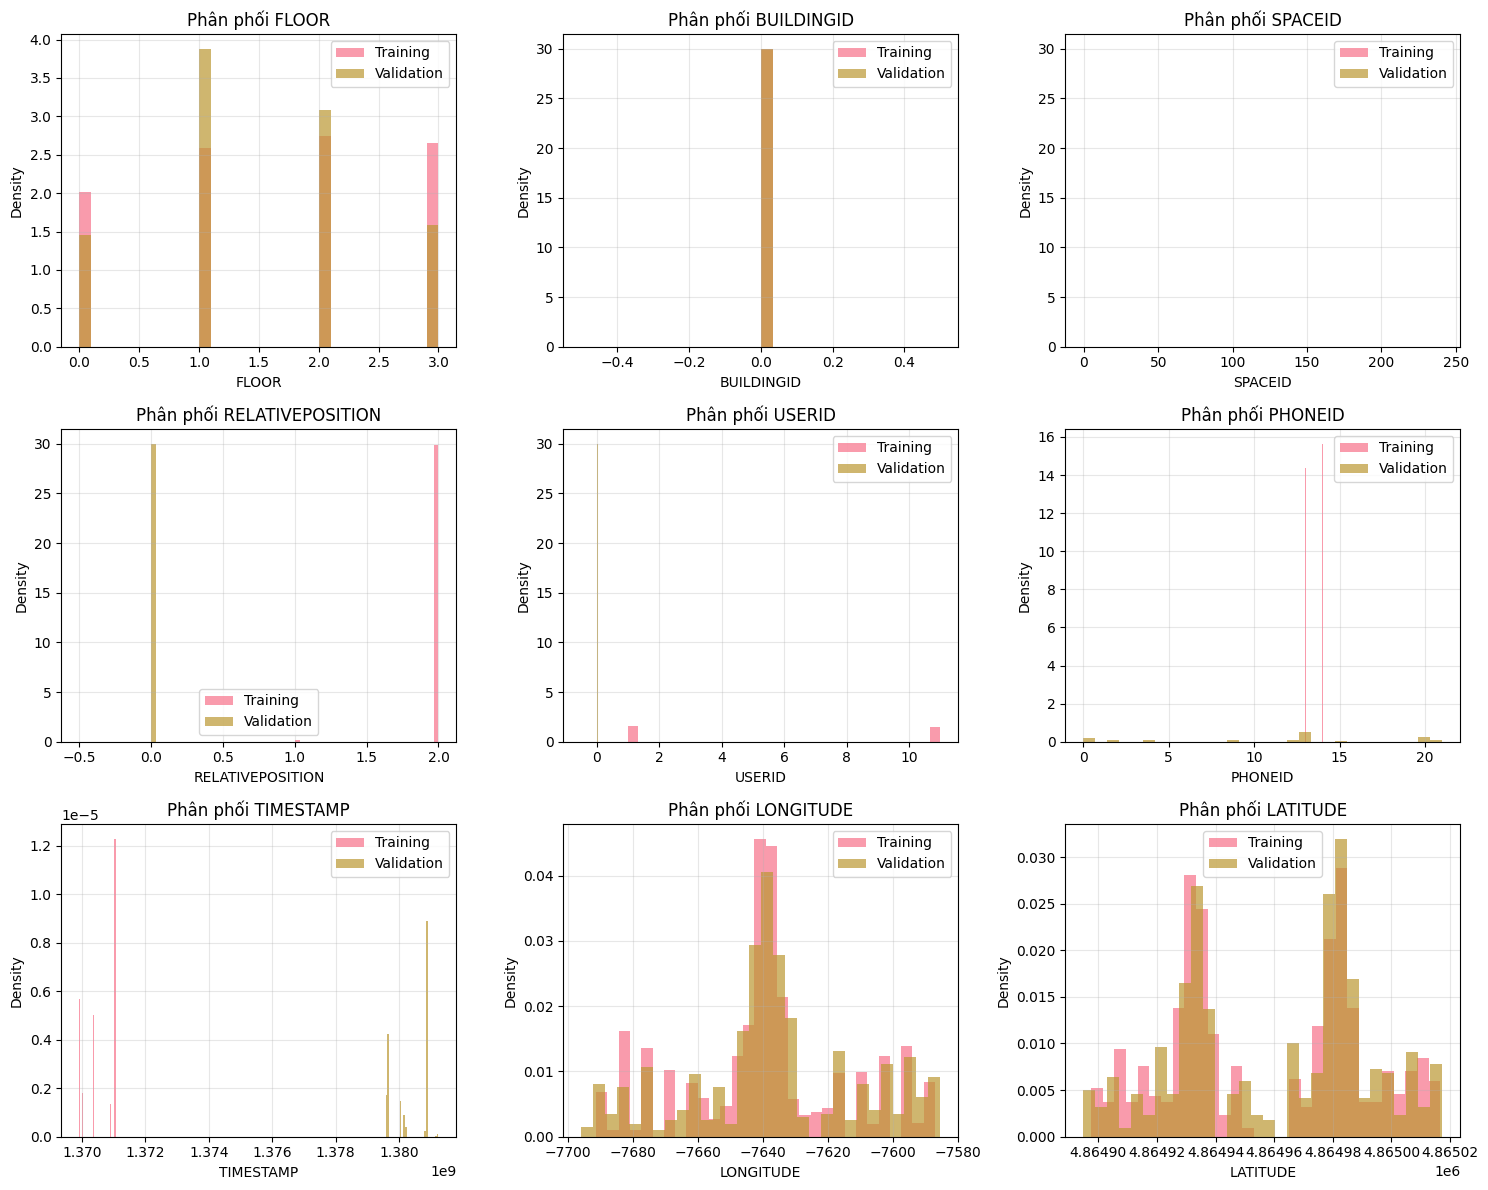

=== SO SÁNH THỐNG KÊ CÁC TRƯỜNG METADATA ===
                  Training_mean  Validation_mean   Training_std  \
FLOOR              1.603163e+00     1.479478e+00       1.083094   
BUILDINGID         0.000000e+00     0.000000e+00       0.000000   
SPACEID            1.679899e+02     0.000000e+00      51.158690   
RELATIVEPOSITION   1.994475e+00     0.000000e+00       0.074131   
USERID             5.785673e+00     0.000000e+00       4.995880   
PHONEID            1.352143e+01     1.122575e+01       0.499588   
TIMESTAMP          1.370588e+09     1.380350e+09  486214.958471   
LONGITUDE         -7.639312e+03    -7.636594e+03      24.950489   
LATITUDE           4.864958e+06     4.864961e+06      32.685043   

                  Validation_std  
FLOOR                   0.927034  
BUILDINGID              0.000000  
SPACEID                 0.000000  
RELATIVEPOSITION        0.000000  
USERID                  0.000000  
PHONEID                 6.885402  
TIMESTAMP          566434.936887  
LONG

In [10]:
# So sánh phân phối các trường metadata (không phải AP)
metadata_cols = ['FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'LONGITUDE', 'LATITUDE']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(metadata_cols):
    ax = axes[i]
    
    # Histogram cho cả hai tập dữ liệu
    ax.hist(training_data[col], alpha=0.7, label='Training', bins=30, density=True)
    ax.hist(validation_data[col], alpha=0.7, label='Validation', bins=30, density=True)
    
    ax.set_title(f'Phân phối {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Thống kê so sánh
print("=== SO SÁNH THỐNG KÊ CÁC TRƯỜNG METADATA ===")
comparison_stats = pd.DataFrame({
    'Training_mean': training_data[metadata_cols].mean(),
    'Validation_mean': validation_data[metadata_cols].mean(),
    'Training_std': training_data[metadata_cols].std(),
    'Validation_std': validation_data[metadata_cols].std()
})
print(comparison_stats)

=== SO SÁNH PHÂN PHỐI TÍN HIỆU AP (loại bỏ giá trị -105) ===


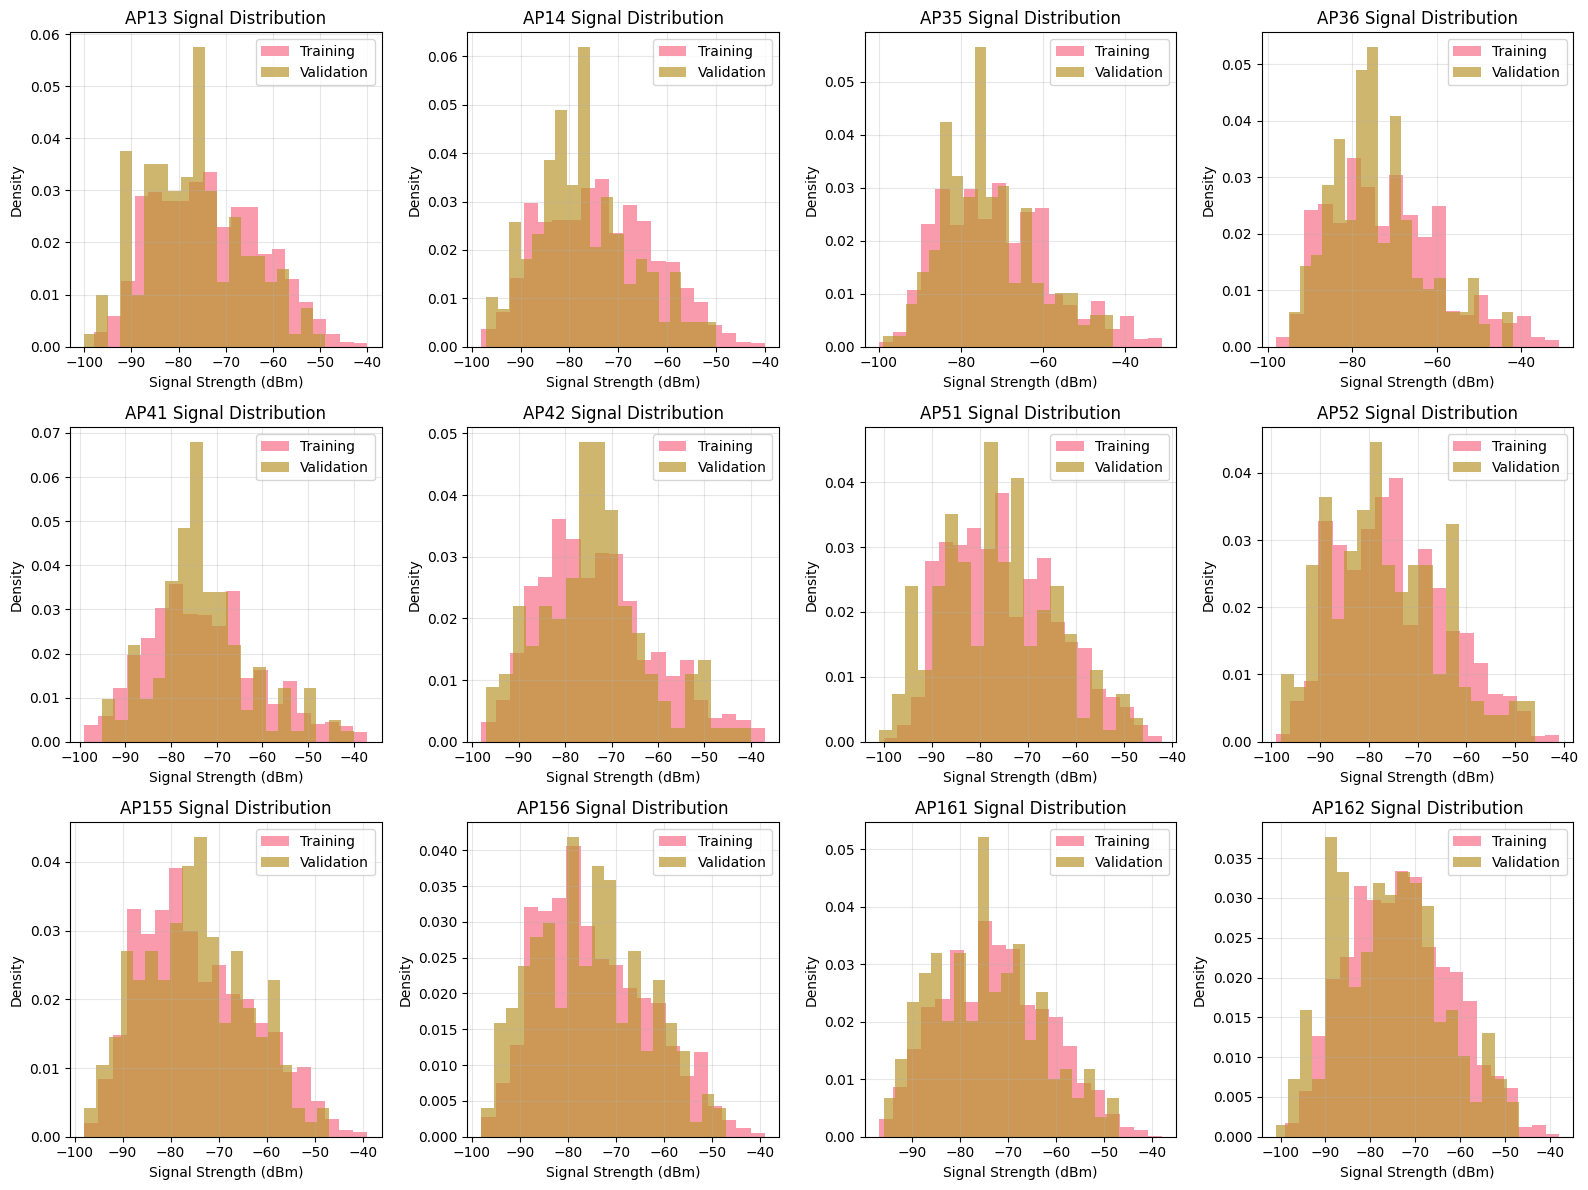

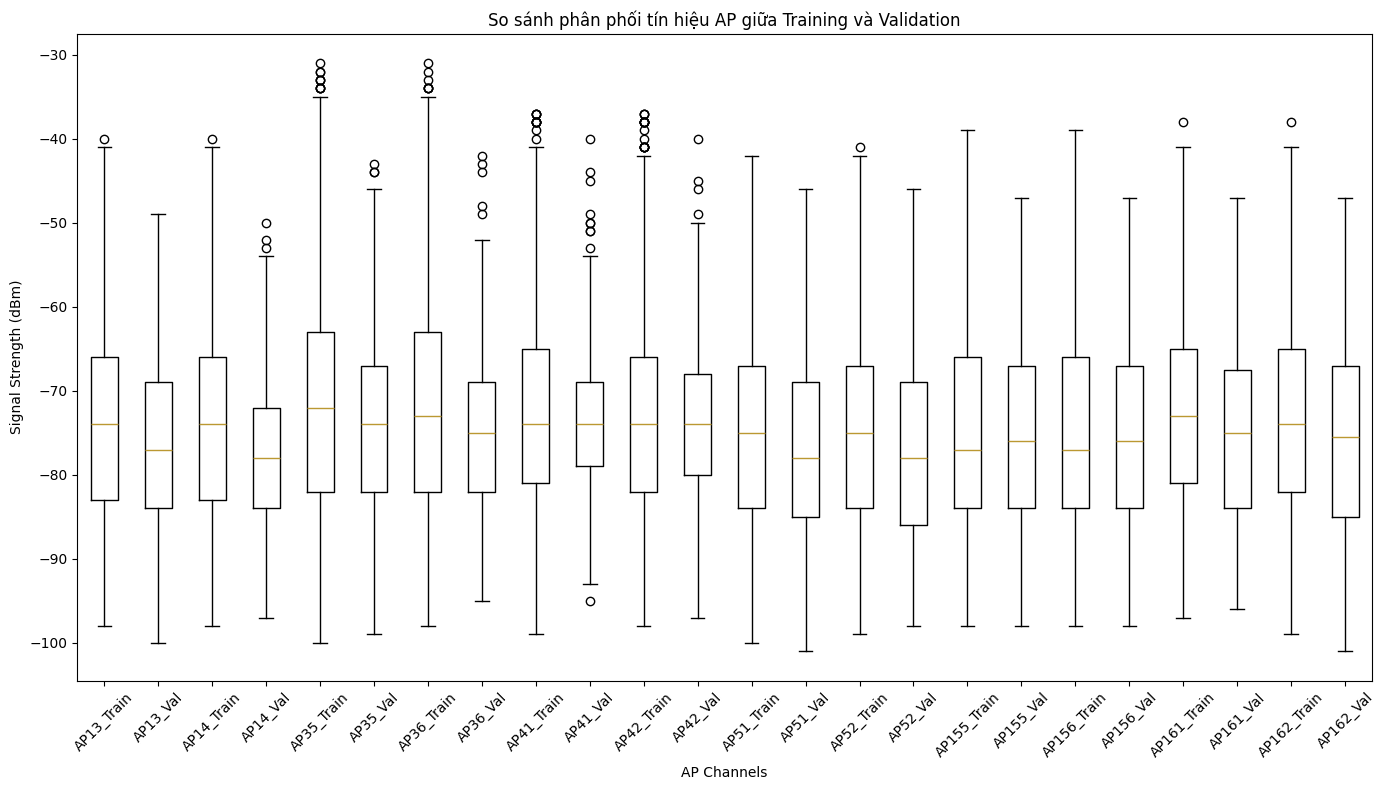

In [11]:
# So sánh phân phối tín hiệu AP (loại bỏ giá trị -105)
print("=== SO SÁNH PHÂN PHỐI TÍN HIỆU AP (loại bỏ giá trị -105) ===")

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(ap_columns):
    ax = axes[i]
    
    # Lọc bỏ giá trị -105 (không có tín hiệu)
    train_signal = training_data[training_data[col] != -105][col]
    val_signal = validation_data[validation_data[col] != -105][col]
    
    if len(train_signal) > 0 and len(val_signal) > 0:
        # Histogram cho cả hai tập dữ liệu
        ax.hist(train_signal, alpha=0.7, label='Training', bins=20, density=True)
        ax.hist(val_signal, alpha=0.7, label='Validation', bins=20, density=True)
        
        ax.set_title(f'{col} Signal Distribution')
        ax.set_xlabel('Signal Strength (dBm)')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, 'No valid signals', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{col} - No Data')

plt.tight_layout()
plt.show()

# Box plot so sánh
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Chuẩn bị dữ liệu cho box plot
data_for_boxplot = []
labels_for_boxplot = []

for col in ap_columns:
    train_signal = training_data[training_data[col] != -105][col]
    val_signal = validation_data[validation_data[col] != -105][col]
    
    if len(train_signal) > 0:
        data_for_boxplot.append(train_signal)
        labels_for_boxplot.append(f'{col}_Train')
    
    if len(val_signal) > 0:
        data_for_boxplot.append(val_signal)
        labels_for_boxplot.append(f'{col}_Val')

ax.boxplot(data_for_boxplot, labels=labels_for_boxplot)
ax.set_title('So sánh phân phối tín hiệu AP giữa Training và Validation')
ax.set_ylabel('Signal Strength (dBm)')
ax.set_xlabel('AP Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. So sánh phân phối các trường phân loại

Trong phần này, chúng ta sẽ so sánh phân phối của các trường phân loại như FLOOR, USERID, PHONEID giữa tập training và validation.

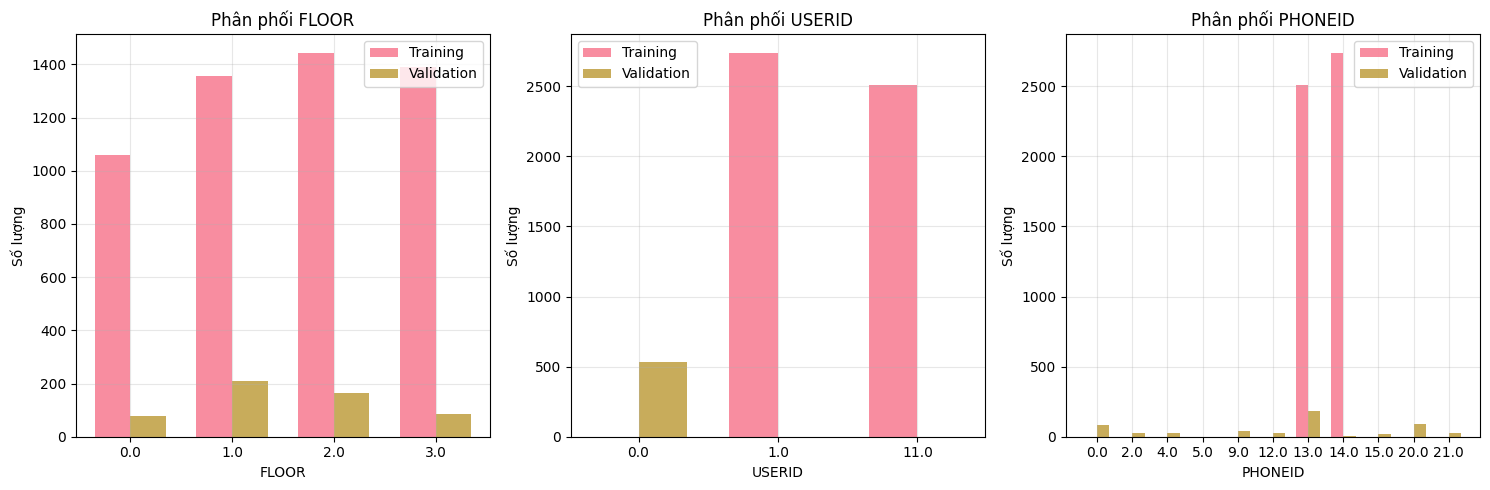

=== THỐNG KÊ CHI TIẾT CÁC TRƯỜNG PHÂN LOẠI ===

FLOOR:
Training data:
FLOOR
0.0    1059
1.0    1356
2.0    1443
3.0    1391
Name: count, dtype: int64

Validation data:
FLOOR
0.0     78
1.0    208
2.0    165
3.0     85
Name: count, dtype: int64
--------------------------------------------------

USERID:
Training data:
USERID
1.0     2737
11.0    2512
Name: count, dtype: int64

Validation data:
USERID
0.0    536
Name: count, dtype: int64
--------------------------------------------------

PHONEID:
Training data:
PHONEID
13.0    2512
14.0    2737
Name: count, dtype: int64

Validation data:
PHONEID
0.0      83
2.0      30
4.0      29
5.0       1
9.0      38
       ... 
13.0    186
14.0      4
15.0     18
20.0     94
21.0     26
Name: count, Length: 11, dtype: int64
--------------------------------------------------


In [12]:
# So sánh phân phối các trường phân loại
categorical_cols = ['FLOOR', 'USERID', 'PHONEID']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Đếm giá trị cho từng tập dữ liệu
    train_counts = training_data[col].value_counts().sort_index()
    val_counts = validation_data[col].value_counts().sort_index()
    
    # Tạo chỉ số chung cho cả hai tập
    all_values = sorted(set(train_counts.index) | set(val_counts.index))
    
    train_values = [train_counts.get(val, 0) for val in all_values]
    val_values = [val_counts.get(val, 0) for val in all_values]
    
    x = np.arange(len(all_values))
    width = 0.35
    
    ax.bar(x - width/2, train_values, width, label='Training', alpha=0.8)
    ax.bar(x + width/2, val_values, width, label='Validation', alpha=0.8)
    
    ax.set_title(f'Phân phối {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Số lượng')
    ax.set_xticks(x)
    ax.set_xticklabels(all_values)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Thống kê chi tiết cho các trường phân loại
print("=== THỐNG KÊ CHI TIẾT CÁC TRƯỜNG PHÂN LOẠI ===")
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("Training data:")
    print(training_data[col].value_counts().sort_index())
    print("\nValidation data:")
    print(validation_data[col].value_counts().sort_index())
    print("-" * 50)

## 7. Phân tích tương quan giữa các trường số

Trong phần này, chúng ta sẽ phân tích ma trận tương quan giữa các trường số để hiểu mối quan hệ giữa chúng.